In [1]:
%load_ext autoreload
%autoreload 2

In [118]:
from datasets import get_dataset
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import time
from configs.get_configs import get_config


class DotDict(dict):
    def __getattr__(self, key):
        return self[key]
    def __setattr__(self, key, val):
        if key in self.__dict__:
            self.__dict__[key] = val
        else:
            self[key] = val

            
args = DotDict()
args.conf = "dw_128"
args.test = False
args.DDP = False

In [3]:
%%capture
config = get_config(args)
args.config = config

In [4]:
trainds, evalds, builder = get_dataset(args)

In [143]:
from run_lib import evaluate
torch.cuda.device_count()

1

In [144]:
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

2513

In [145]:
%%capture
args = DotDict()
args.conf = "128_deep"
args.test = False
args.DDP = False
args.workdir = "pfgm_128_deep_v2"
args.eval_folder = "eval"
args.sampling = True
config = get_config(args)
args.config = config
args.config.device = 'cuda'
args.config.sampling.ode_solver = 'torchdiffeq'
args.config.sampling.ckpt_number = 480000
args.config.eval.num_samples = 8

In [146]:
start = time.time()
evaluate(args)
stop = time.time()

Initilaized MEL training dataset.
Initilaized MEL validation dataset.
BUILDING MODEL...
MODEL BUILT!
Created Model
--- sampling eps: 0.001
Loading from  pfgm_128_deep_v2/checkpoints/checkpoint_480000.pth
Sampling for 2 rounds...
sampling -- ckpt: 480000, round: 0
nfe: 0
sample shape: torch.Size([8, 1, 128, 128])
Saving images as raw mel specs.
sampling -- ckpt: 480000, round: 1
nfe: 0
sample shape: torch.Size([8, 1, 128, 128])
Saving images as raw mel specs.


In [147]:
print(stop-start)

93.68240261077881


In [143]:
for i, item in enumerate(trainds):
    if i>1: break
    print(item.max(), item.min())

tensor(0.9909) tensor(-0.9709)
tensor(1.0000) tensor(-0.9427)


0.0 1.0 0.65948164
0.0


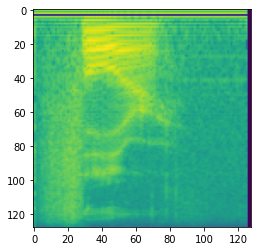

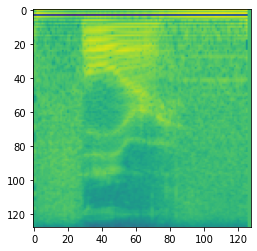

0.0 1.0 0.45941386
9.778887e-09


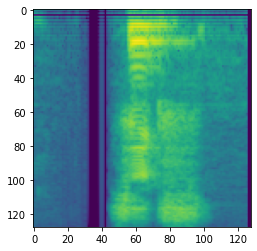

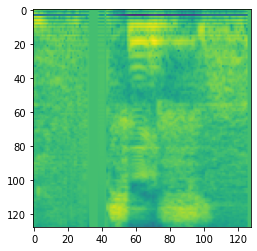

0.0 1.0 0.63037276
1.4901161e-08


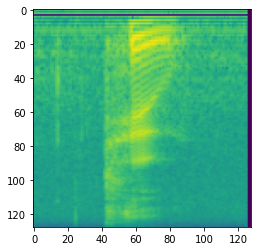

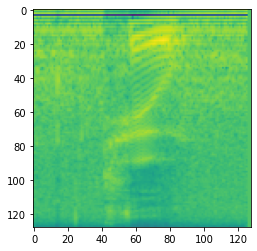

0.0 1.0 0.57892585
-3.7252903e-09


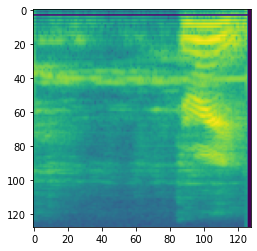

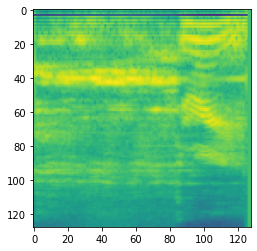

0.0 1.0 0.6173124
-1.4901161e-08


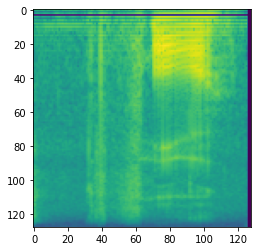

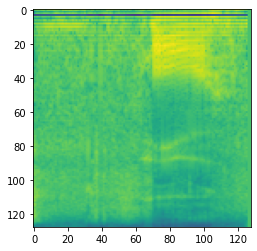

0.0 1.0 0.62322843
7.450581e-09


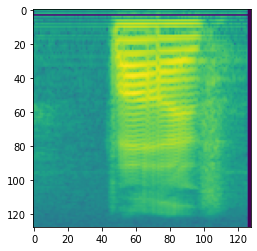

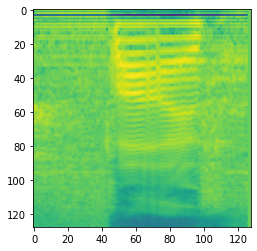

In [14]:
for i, item in enumerate(trainds):
    if i>5: break
    spec = item[0][0].numpy()
    spec_demean = spec - (np.mean(spec, axis=0) + 1e-8)
    print(spec.min(), spec.max(), spec.mean())
    print(spec_demean.mean())
    plt.figure()
    plt.imshow(spec)
    plt.show()
    plt.figure()
    plt.imshow(spec_demean)
    plt.show()

In [46]:
# Calculate norms on CIFAR10 for comparison
import torchvision
cf10 = torchvision.datasets.CIFAR10(root='.', download=True)

norms_2 = []
norms = []
for item in tqdm(cf10):
    pic = np.array(item[0]) / 255.0
    norm_2 = np.sqrt(pic.ravel()**2)
    norms_2.append(norm_2)
    norm = pic.ravel()**2
    norms.append(norm)

print(np.array(norms).mean(), np.array(norms_2).mean())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:05<00:00, 9378.86it/s]


AttributeError: 'list' object has no attribute 'mean'

In [73]:
norms_2 = []
norms = []
for batch in tqdm(trainds):
    for item in batch:
        norm = item.numpy().ravel()**2
        norms.append(norm)
        norm_2 = np.sqrt(item.numpy().ravel()**2)
        norms_2.append(norm_2)

print(np.array(norms.mean()), np.array(norms_2).mean())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15579/15579 [00:58<00:00, 267.65it/s]
